In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
act_raw = pd.read_csv('../BigContest/train_activity.csv')

In [51]:
act = act_raw

In [4]:
act.dtypes

day                    int64
acc_id                 int64
char_id                int64
server                object
playtime             float64
npc_kill             float64
solo_exp             float64
party_exp            float64
quest_exp            float64
boss_monster           int64
death                float64
revive               float64
exp_recovery         float64
fishing              float64
private_shop         float64
game_money_change    float64
enchant_count        float64
dtype: object

In [5]:
act.head()

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,boss_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,1,75001,397380,aa,1.459994,0.000000,0.000000,0.000000,0.000000,0,0.00000,0.000000,0.0,0.0,1.119053,0.033934,0.0
1,1,75001,216231,aa,0.286785,2.244221,0.046989,0.000000,0.000000,0,0.00000,0.000000,0.0,0.0,0.000000,-0.013933,0.0
2,1,75711,308769,aa,1.049964,2.951697,0.321164,0.166247,0.003463,1,0.24537,0.246819,0.0,0.0,0.000000,-0.001983,0.0
3,1,72230,387177,aa,0.232272,4.035346,0.098944,0.000000,0.001732,0,0.00000,0.000000,0.0,0.0,0.000000,-0.028823,0.0
4,1,34253,339862,aa,1.102106,0.595805,0.003371,0.000000,0.000000,0,0.00000,0.000000,0.0,0.0,0.000000,0.011752,0.0


In [52]:
 act = act[['acc_id','day']]

In [53]:
act.head()

,acc_id,day
0,75001,1
1,75001,1
2,75711,1
3,72230,1
4,34253,1


In [55]:
b = act.groupby(['acc_id']).count().sort_values(['day','acc_id'])
b.count()
b

,day
acc_id,
41,1
298,1
760,1
862,1
983,1
1106,1
1585,1
1591,1
2156,1


In [50]:
# w=[1,2,3]
# [x*10 for x in w]

[10, 20, 30]

In [15]:
k=0
for i in range(29):
    print(i)
    k=k+i
print(k)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
406


In [18]:
b[b['day']<406].count()

day    9610
dtype: int64

In [86]:
realUser= b[b['day']<=406]

In [76]:
realUser2= b[b['day']>=28]

In [87]:
mrg = label.merge(realUser,on='acc_id')

In [88]:
mrg = mrg.drop(columns='amount_spent')

In [89]:
mrg = mrg.sort_values(['survival_time','day'])

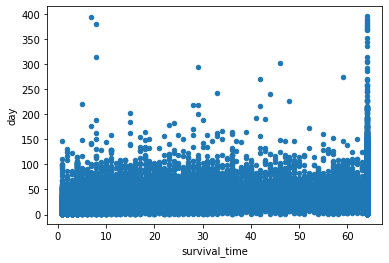

In [90]:

mrg.plot.scatter(x='survival_time',y='day')
plt.show()

In [27]:
label_raw = pd.read_csv('../Bigcontest/train_label.csv')

In [28]:
label= label_raw

In [29]:
mrg = label.merge(realUser,on='acc_id')

In [30]:
mrg.dtypes

acc_id             int64
survival_time      int64
amount_spent     float64
day                int64
dtype: object

In [31]:
mrg.head()

,acc_id,survival_time,amount_spent,day
0,27835,64,0.002559,661
1,12351,64,0.120154,1192
2,125437,55,0.182593,476
3,104483,64,0.016241,687
4,4704,20,0.226396,822


In [33]:
mrg = mrg.drop(columns='amount_spent')

In [34]:
mrg.head()

,acc_id,survival_time,day
0,27835,64,661
1,12351,64,1192
2,125437,55,476
3,104483,64,687
4,4704,20,822


In [35]:
mrg = mrg.sort_values(['survival_time','day'])

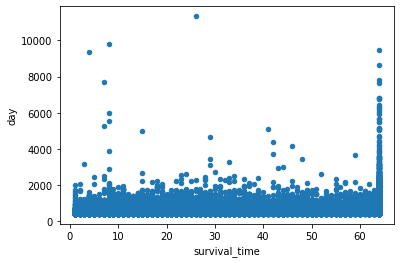

In [38]:

mrg.plot.scatter(x='survival_time',y='day')
plt.show()

In [39]:
deathUser= label[label['survival_time']<64]

In [40]:
mrg = deathUser.merge(realUser,on='acc_id')

In [42]:
mrg.isnull().sum()

acc_id           0
survival_time    0
amount_spent     0
day              0
dtype: int64

In [43]:
mrg = mrg.sort_values(['survival_time','day'])

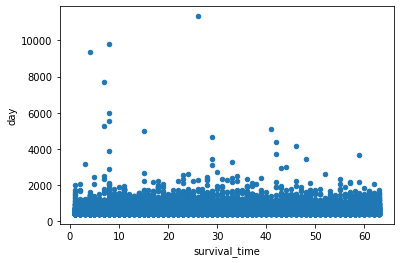

In [44]:

mrg.plot.scatter(x='survival_time',y='day')
plt.show()

In [45]:
# survUser= label[label['survival_time']==64]

In [46]:
# mrg = survUser.merge(realUser,on='acc_id')

In [47]:
# mrg = mrg.sort_values(['survival_time','day'])

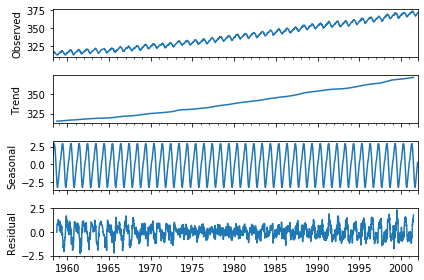

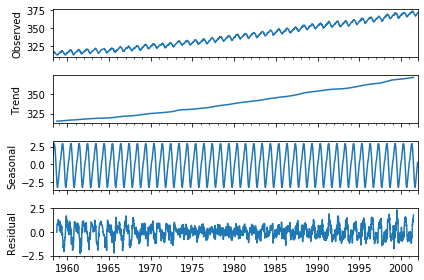

In [20]:
import statsmodels.api as sm

dta = sm.datasets.co2.load_pandas().data
# deal with missing values. see issue
dta.co2.interpolate(inplace=True)

res = sm.tsa.seasonal_decompose(dta.co2)
res.plot()

In [24]:
res.resid
res.seasonal
res.trend

1958-03-29   NaN
1958-04-05   NaN
1958-04-12   NaN
1958-04-19   NaN
1958-04-26   NaN
              ..
2001-12-01   NaN
2001-12-08   NaN
2001-12-15   NaN
2001-12-22   NaN
2001-12-29   NaN
Freq: W-SAT, Name: co2, Length: 2284, dtype: float64